# Derivative of Matrix

## import library

In [26]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load image 

In [27]:
I = img.imread('img2.jpeg') 

## check the size of image

In [28]:
n_row = I.shape[0]
n_col = I.shape[1]

print(I.shape)

(183, 275, 3)


## convert the input image into gray scale if it is color

In [29]:
if I.shape[2] == 3:
    I = np.mean(I, axis=2)

## normalize input image so that the range of image is $[0, 1]$

In [30]:
I = (I - np.min(I))/np.ptp(I)

```git commit -a -m "load image" ``` \
```git push origin master```

## generate a matrix to compute the derivative in $x$-direction

In [31]:
Dx = np.eye(n_col)*(-1)
dx = np.eye(n_col-1)
a = np.zeros((1,n_col-1))
b = np.zeros((n_col,1))
dx = np.vstack([a,dx])
dx = np.hstack([dx,b])
Dx = Dx + dx

## compute the derivative of $I$ with respect to $x$-direction

In [32]:
Ix = np.dot(I,Dx)

```git commit -a -m "compute the derivative in x-direction"``` \
```git push origin master```

## generate a matrix to compute the derivative in $y$-direction

In [33]:
Dy = np.eye(n_row)*(-1)
dy = np.eye(n_row-1)
a = np.zeros((1,n_row-1))
b = np.zeros((n_row,1))
dy = np.vstack([a,dy])
dy = np.hstack([dy,b])
Dy = (Dy+dy).T

## compute the derivative of $I$ with respect to $y$-direction

In [34]:
Iy = np.dot(Dy,I)

```git commit -a -m "compute the derivative in y-direction"``` \
```git push origin master```

## compute $L_2^2$ of the gradient of $I$

In [37]:
norm_gradient = np.zeros((n_row,n_col))
for i in range(n_row):
    for j in range(n_col):
        norm_gradient[i,j] = Ix[i,j]*Ix[i,j]+Iy[i,j]*Iy[i,j]

## define functions for the visualization

In [38]:
def plot_image(I):
    
    plt.figure(figsize=(10,10))
    plt.imshow(I,cmap ='gray',norm=colors.LogNorm() )
    plt.title('input image')
    plt.axis('off')
    

def plot_image_derivative_x(Ix):
    
    plt.figure(figsize=(10,10))
    plt.imshow(Ix,cmap = 'gray', norm=colors.LogNorm() )
    plt.title('image derivative of x')
    plt.axis('off')

    
def plot_image_derivative_y(Iy):
    
    plt.figure(figsize=(10,10))
    plt.imshow(Iy,cmap = 'gray',norm=colors.LogNorm() )
    plt.title('image derivative of y')
    plt.axis('off')

    
def plot_norm_gradient(norm_gradient):

    plt.figure(figsize=(10,10))
    plt.imshow(norm_gradient,cmap = 'gray',norm=colors.LogNorm() )
    plt.title('norm gradient')
    plt.axis('off')


```git commit -a -m "define functions for the visualization"``` \
```git push origin master```

# ###################################################################

# # results

# ###################################################################

# # 01. plot the input image in gray scale

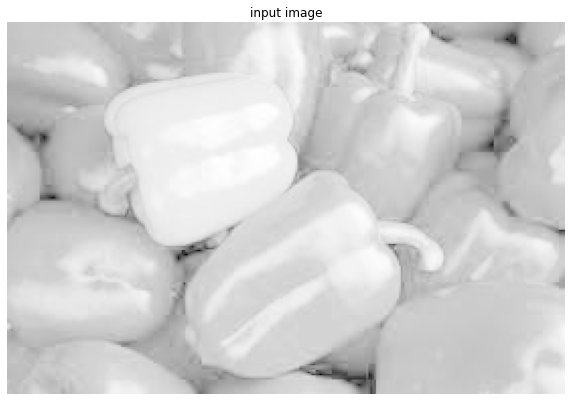

In [12]:
plot_image(I)

# # 02. plot the derivative $I_x$ of input image in x-direction

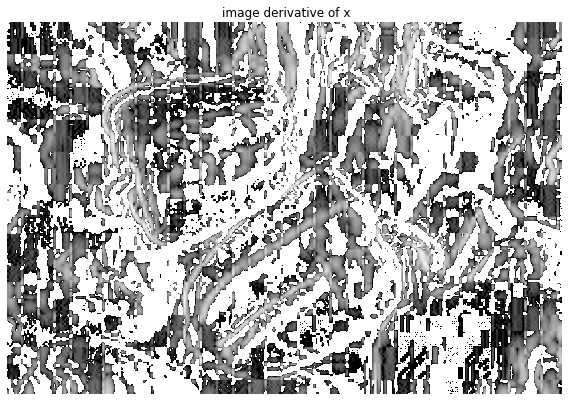

In [13]:
plot_image_derivative_x(Ix)

# # 03. plot the derivative $I_y$ of input image in y-direction

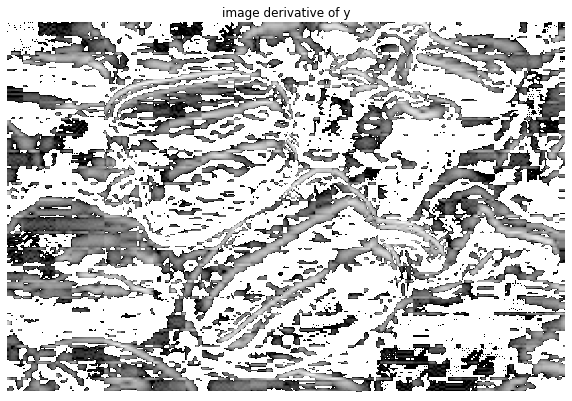

In [14]:
plot_image_derivative_y(Iy)

# # 04. plot $L_2^2$ norm $I_x^2 + I_y^2$ of the gradient of input image

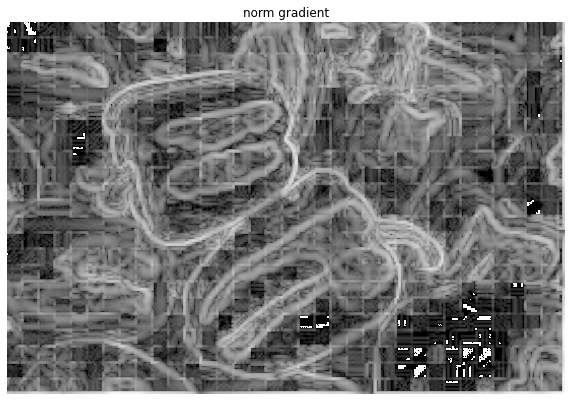

In [15]:
plot_norm_gradient(norm_gradient)